# Select optimal influencer to advertise product based on their posts similarity
- map photos, videos, and texts to vectors
- compute distance between influencer's vectors and product's vectors

# 1. Embed images with cnn-based pre-trained machine learning models

In [1]:
from img2vec_pytorch import Img2Vec
from PIL import Image
import os

In [2]:
sub = ['influencer','product']
product_type = ['jewelry']
infl_path = os.path.join(sub[0],product_type[0])
infl = [i for i in os.listdir(infl_path) if not os.path.isfile(os.path.join(infl_path,i))]

prod_path = os.path.join(sub[1],product_type[0])
prod = [i for i in os.listdir(prod_path) if not os.path.isfile(os.path.join(prod_path,i))]

In [3]:
infl

['jimmyxboi', 'thediamondsgirl']

In [4]:
prod

['cartier', 'tiffanyandco']

In [5]:
infl_photo_path = [os.path.join(infl_path,infl[0],i) for i in os.listdir(os.path.join(infl_path,infl[0])) if i.endswith('jpg')]

In [6]:
infl_photo_path[0:3]

['influencer\\jewelry\\jimmyxboi\\2021-08-14_05-15-42_UTC.jpg',
 'influencer\\jewelry\\jimmyxboi\\2021-08-16_20-51-45_UTC.jpg',
 'influencer\\jewelry\\jimmyxboi\\2021-08-18_20-56-25_UTC_1.jpg']

In [7]:
prod_photo_path = [os.path.join(prod_path, prod[0],i) for i in os.listdir(os.path.join(prod_path,prod[0])) if i.endswith('jpg')]

In [8]:
prod_photo_path[0:3]

['product\\jewelry\\cartier\\2021-09-15_01-45-33_UTC_1.jpg',
 'product\\jewelry\\cartier\\2021-09-15_01-45-33_UTC_2.jpg',
 'product\\jewelry\\cartier\\2021-09-15_01-45-33_UTC_3.jpg']

## embed images using Img2Vec
- https://github.com/christiansafka/img2vec

In [9]:
# Initialize Img2Vec with GPU
img2vec = Img2Vec(cuda=True)

# Read in an image (rgb format)
product1_images = []
infl1_images = []
for i in prod_photo_path:
    product1_images.append(Image.open(i))
for i in infl_photo_path:
    infl1_images.append(Image.open(i))

# Get a vector from img2vec, returned as a torch FloatTensor
vec1 = img2vec.get_vec(product1_images, tensor=True)
nor_vec1 = vec1 / vec1.sum(0).expand_as(vec1)

vec2 = img2vec.get_vec(infl1_images, tensor=True)
nor_vec2 = vec2 / vec2.sum(0).expand_as(vec2)

C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\torchvision\transforms\transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [10]:
vec1.size()

torch.Size([24, 512, 1, 1])

In [11]:
vec2.size()

torch.Size([30, 512, 1, 1])

### plot image

In [12]:
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [13]:
prod_im = torch.reshape(vec1,(len(product1_images),16,32))
prod_im.size()

torch.Size([24, 16, 32])

In [14]:
infl_im = torch.reshape(vec2,(len(infl1_images),16,32))
infl_im.size()

torch.Size([30, 16, 32])

### product @cartier sample post, https://www.instagram.com/p/CT0wauqteRJ/

In [15]:
prod_photo_path[0]

'product\\jewelry\\cartier\\2021-09-15_01-45-33_UTC_1.jpg'

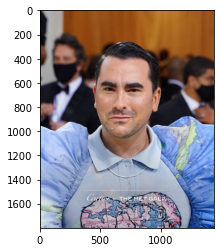

In [16]:
imshow(product1_images[0])

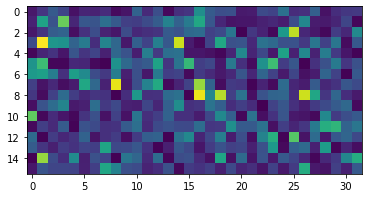

In [17]:
plt.imshow(prod_im[0,:,:])
plt.show()

### influencer @jimmyxboipost sample, https://www.instagram.com/p/CRIupV1nnrV/

In [18]:
infl_photo_path[0]

'influencer\\jewelry\\jimmyxboi\\2021-08-14_05-15-42_UTC.jpg'

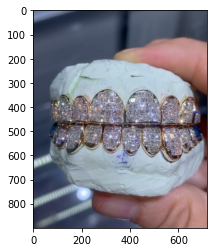

In [19]:
imshow(infl1_images[0])

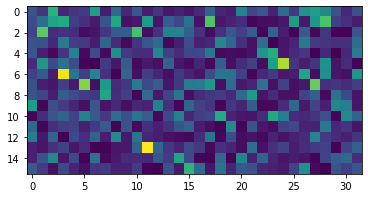

In [20]:
imshow(infl_im[0])

## distance between two distributions
- KL divergence
- JS divergence

In [21]:
nor_vec1 = torch.squeeze(nor_vec1)
nor_vec1.size()

torch.Size([24, 512])

In [22]:
nor_vec2 = torch.squeeze(nor_vec2)
nor_vec2.size()

torch.Size([30, 512])

In [81]:
def unitstd(data):
    data = np.array(data)
    return (data-data.min())/(data.max()-data.min())

In [82]:
from scipy.stats import norm
import numpy as np

# calculate the kl divergence
def kl_divergence(p, q):
    p,q = unitstd(p),unitstd(q)
    return np.sum(np.where(((p!= 0)&(q!=0)), p*np.log(p/q), 0))

# calculate the js divergence
def js_divergence(p, q):
    p,q = unitstd(p),unitstd(q)
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [83]:
kl_divergence(nor_vec1[0,:],nor_vec2[0,:])

C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


105.855896

In [85]:
js_divergence(nor_vec1[0,:],nor_vec2[0,:])

C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


-6.9468406438827515

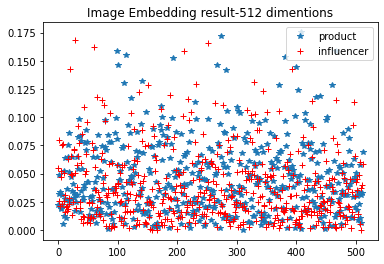

In [26]:
plt.plot(nor_vec1[0,:],'*',label='product')
plt.plot(nor_vec2[0,:], '+',c='red',label='influencer')
plt.legend()
plt.title('Image Embedding result-512 dimentions')
plt.show()

In [27]:
nor_vec1[0,:].min()

tensor(0.)

In [28]:
nor_vec2[0,:].min()

tensor(0.)

In [75]:
nor_vec2[0,:].max()

tensor(0.1682)

# 2. Embeding videos
- consider a video as many frames, embed each image and then get the average

# 3. Embed post text, comments
- ELMo

In [64]:
#!pip install -U sentence-transformers

In [29]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
infl_text_path = [os.path.join(infl_path,infl[0],i) for i in os.listdir(os.path.join(infl_path,infl[0])) if i.endswith('txt')]

In [32]:
infl_text_path[0:3]

['influencer\\jewelry\\jimmyxboi\\2021-08-14_05-15-42_UTC.txt',
 'influencer\\jewelry\\jimmyxboi\\2021-08-16_20-51-45_UTC.txt',
 'influencer\\jewelry\\jimmyxboi\\2021-08-18_20-56-25_UTC.txt']

In [31]:
prod_text_path = [os.path.join(prod_path, prod[0],i) for i in os.listdir(os.path.join(prod_path,prod[0])) if i.endswith('txt')]

In [33]:
prod_text_path[0:3]

['product\\jewelry\\cartier\\2021-09-15_01-45-33_UTC.txt',
 'product\\jewelry\\cartier\\2021-09-15_12-55-05_UTC.txt',
 'product\\jewelry\\cartier\\2021-09-18_10-00-50_UTC.txt']

In [43]:
infl_texts = []
for i in infl_text_path:
    with open(i,'r',encoding="utf8") as f:
        infl_texts.append(f.read())
        
prod_texts = []
for i in prod_text_path:
    with open(i,'r',encoding="utf8") as f:
        prod_texts.append(f.read())

In [44]:
len(infl_texts)

10

In [45]:
len(prod_texts)

10

In [42]:
infl_texts[0:3]

['1st ever tri color flawless invisible set princess cut grill done the right way… pay close attention & you can have it if you find a cloud, I dare you 😉 #DoneRight #THEjeweler #DoneRizzle @donerightandco\n',
 'Only jeweler that’ll only make what he would wear… don’t let that go over your head. @loudcannabiswa got that real qualitayyy just like their flowers make sure you hit them up in you’re in the area #L2H @donerightandco\n',
 'This workout journey hasn’t been easy but what’s worth it that is? Been dealing with being overweight since I can remember & now Ive decided to spend the rest of my life challenging my body like I’ve been challenging my mind and hustle. Feels good to be able to get stronger by the day & continue to work on my self to have better health to keep up with my kids & whoop @vannah future boyfriends if I need to 😬. So join me on my journey w/ @johnathancaprille @fastresultsfitness & I promise you I ain’t giving up. We gon do it the right way not the light way. All

In [46]:
prod_texts[0:3]

['Audacious combinations marked the #MetGala red carpet, where guests of the Maison paired extraordinary designs from the archives with modern creations for looks that reflected the @metmuseum exhibition’s theme. @instadanjlevy @billieeilish @tchalamet @yarashahidi #CareyMulligan @troyesivan @maisie_williams @taikawaititi  #CartierRedCarpet\n',
 'Then, now, forever: The 2021 #MetGala marks another chapter in the Maison’s American legacy. @yarashahidi #CareyMulligan @troyesivan @maisie_williams Photography: @uplusa_studio @christianhogstedt #CartierRedCarpet\n',
 'From Cartier’s new High Jewelry collection, this necklace interprets the Maison’s Tutti Frutti style: an explosion of flower, fruit and palm leaf motifs, smooth and ridged orbs, rubies, sapphires, and emeralds; their color combination has been emblematic of the Cartier style since the 1920s. #CartierSavoirFaire #CartierHighJewelry #Cartier6S\n']

### embedding product post text and influencer post text

In [62]:
infl_text_embeddings = model.encode(infl_texts[0],convert_to_tensor=True)

In [66]:
prod_text_embeddings = model.encode(prod_texts[0],convert_to_tensor=True)

In [63]:
infl_text_embeddings.shape

torch.Size([384])

In [53]:
prod_text_embeddings.shape

(384,)

In [71]:
non_infl_text_embeddings = infl_text_embeddings / infl_text_embeddings.sum(0).expand_as(infl_text_embeddings)

In [67]:
non_prod_text_embeddings = prod_text_embeddings / prod_text_embeddings.sum(0).expand_as(prod_text_embeddings)

### distance

In [86]:
kl_divergence(non_infl_text_embeddings.to('cpu'),non_prod_text_embeddings.to('cpu'))

C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


41.998817

In [90]:
unitstd(non_infl_text_embeddings.to('cpu')).min()

0.0

In [88]:
js_divergence(non_infl_text_embeddings.to('cpu'),non_prod_text_embeddings.to('cpu'))

C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\hanlab\Anaconda3\envs\vince-ins\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


-13.774502396583557

# 4. number of likes, comments, posts, followers

# 5. number of genuine followers, active followers (posted during past 30 days)

# 6. image - text similarity